In [1]:
from model import FFNet, tv_model, ResBam
from learning import Learn, Selector, Metrics
from dataset import SKDS, TVDS, CDataset, ImageDatasetStats, AsTensor, Squeeze, DType

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [2]:
import numpy as np

class DummyDataset(CDataset):
    def load_data(self, boom='bust'):
        """datadic with keys X, target, embeds (with or without 'features')"""
        datadic = {1: {'X': {'all': np.asarray([.01,.02]),
                             'feature_a': np.asarray([.01]),
                             'feature_b': np.asarray([.02])},
                       'embeds': {'feature_c': 'a',
                                  'feature_d': 'b'},
                       'targets': {'feature_e': np.asarray([.3]),
                                   'feature_f': np.asarray([.4])}},
                   2: {'X': {'all': np.asarray([.03,.04]),
                             'feature_a': np.asarray([.03]),
                             'feature_b': np.asarray([.04])},
                       'embeds': {'feature_c': 'c',
                                  'feature_d': 'd'},
                       'targets': {'feature_e': np.asarray([.7]),
                                   'feature_f': np.asarray([.8])}}}
        print(boom)
        return datadic
    
class DummyTransform():
    def __call__(self, arr):
        return np.add(arr, 10)
    
ds_params = {'train_params': {'features': ['all'],
                              'embeds': ['feature_c'],
                              'targets': ['feature_f'],
                              'embed_lookup': {'a': 1, 'b': 2, 'c': 3, 'd': 4},
                              'transform': DummyTransform(),
                              'target_transform': False,
                              'boom': 'bang'}}
    
d = DummyDataset(**ds_params['train_params'])
d[2]

bang
CDataset created...


(array([10.03, 10.04]), array([3]), array([0.8]))

In [3]:
ds_params = {'train_params': {'make': 'make_regression',
                              'sk_params': {'n_samples': 100,
                                            'n_features': 5},
                              'features_dtype': 'float32',
                              'targets_dtype': 'float32'}}

sk = SKDS(**ds_params['train_params'])

sk[1]

CDataset created...
SKDS make_regression created...


(array([-0.13873787, -1.6053834 , -1.0470335 , -1.9683658 ,  1.6255466 ],
       dtype=float32),
 [],
 array([-102.09545], dtype=float32))

In [4]:
ds_params = {'train_params': {'make': 'make_classification',
                              'features_dtype': 'float32',
                              'targets_dtype': 'int64',
                              'sk_params': {'n_samples': 100,
                                            'n_features': 10,
                                            'n_informative': 8,
                                            'n_clusters_per_class': 2,
                                            'flip_y': 0.05,
                                            'class_sep': 0.01,
                                            'n_classes': 4}}}

sk = SKDS(**ds_params['train_params'])

sk[1]

CDataset created...
SKDS make_classification created...


(array([ 1.4567806 ,  2.2511747 ,  0.89418924,  2.0568264 , -0.11372357,
         0.79943997,  1.6271449 ,  0.70029455, -0.21601924, -0.12370378],
       dtype=float32),
 [],
 array([1]))

In [5]:
ds_params={'dataset': 'MNIST',
           'tv_params': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([
                                           transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_params)
tvds[1]

CDataset created...
TVDS created...


(<PIL.Image.Image image mode=L size=224x224 at 0x7FCA29396A90>, [], 0)

In [ ]:
ds_params={'dataset': 'MNIST',
           'tv_params': {'root': './data/',
                         'train': True,
                         'download': True,
                         'transform': transforms.Compose([
                                           transforms.Resize(224)]),
                         'target_transform': None}}

tvds = TVDS(**ds_params)
ids = ImageDatasetStats(tvds)

print('mean: ', ids.stats.mean)
print('stddev: ', ids.stats.stddev)

#mean: 33.3/255 = .13
#stddev: 73.7/255 = .29

CDataset created...
SKDS make_regression created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:02.064883
epoch: 0, lr: 0.01
train loss: 685788.8055555555, val loss: 646536.2
sklearn train metric: 0, sklearn validation metric: 0
learning time: 0:00:07.542236
epoch: 10, lr: 0.01
train loss: 14174.714879918982, val loss: 10771.8625
sklearn train metric: 0, sklearn validation metric: 0
test loss: 9765.2560546875
learning time: 0:00:12.629021
sklearn test metric: 
0 



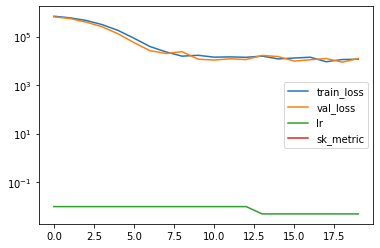

In [6]:
model_params = {'D_in': 256, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features_dtype': 'float32',
                              'targets_dtype': 'float32',
                              'make': 'make_regression',
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 256,
                                            'n_informative': 200}}}
             
metrics_params = {'report_interval': 10}                         
             
opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([SKDS], 
          FFNet,
          Metrics=Metrics,
          Sampler=Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=20)

CDataset created...
SKDS make_classification created...
CModel loaded...
FFNet model loaded...
learning time: 0:00:00.809998
epoch: 0, lr: 0.01
train loss: 1.4235556390550401, val loss: 1.3951208916577427
sklearn train metric: 0.5032220785578876, sklearn validation metric: 0.4980096467952986
learning time: 0:00:08.750048
epoch: 10, lr: 0.01
train loss: 0.18404887285497454, val loss: 1.1615527163852344
sklearn train metric: 0.9928450531944661, sklearn validation metric: 0.8880850428036955
test loss: 1.1860290223901921
learning time: 0:00:16.224224
sklearn test metric: 
0.9203696592699004 



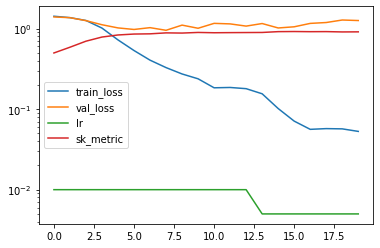

In [7]:
model_params = {'D_in': 256, 
                'H': 192, 
                'D_out': 4, 
                'model_name': 'funnel'}

ds_params = {'train_params': {'features_dtype': 'float32',
                              'targets_dtype': 'int64',
                              'make': 'make_classification',
                              'sk_params': {'n_samples': 10000,
                                            'n_features': 256,
                                            'n_informative': 200,
                                            'n_clusters_per_class': 3,
                                            'flip_y': 0.05,
                                            'class_sep': 0.1,
                                            'n_classes': 4}}}
                                     
metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}

sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}

l = Learn([SKDS], 
          FFNet, 
          Sampler=Selector,
          Metrics=Metrics,
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss,
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=128, epochs=20, squeeze_y=True)

Files already downloaded and verified
CDataset created...
TVDS created...
Files already downloaded and verified
CDataset created...
TVDS created...
TorchVision model resnet18 loaded...
learning time: 0:00:12.377065
epoch: 0, lr: 0.01
train loss: 2.3511950984001158, val loss: 2.060691868105242
sklearn train metric: 0.6247624234818497, sklearn validation metric: 0.709745603396361
learning time: 0:00:24.434987
epoch: 1, lr: 0.01
train loss: 2.0449428544044497, val loss: 2.050067203660165
sklearn train metric: 0.7109471026257923, sklearn validation metric: 0.7456030595151033
learning time: 0:00:36.687709
epoch: 2, lr: 0.01
train loss: 1.9384403324127197, val loss: 1.8838942089388448
sklearn train metric: 0.7555738764858253, sklearn validation metric: 0.7815877214042775
learning time: 0:00:48.868597
epoch: 3, lr: 0.01
train loss: 1.8546954765319825, val loss: 1.816320953830596
sklearn train metric: 0.7807574723913377, sklearn validation metric: 0.802858266412534
learning time: 0:01:01.05039

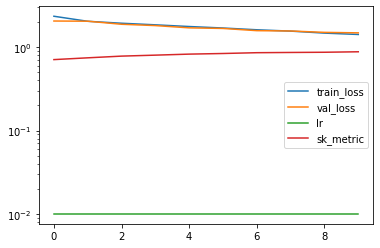

In [9]:
model_params = {'model_name': 'resnet18',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.RandomRotation(10),
                                                           transforms.Resize(224),
                                                           transforms.ToTensor()]),
                                          'target_transform': None,
                                          'download': True}},
           'test_params': {'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(224),
                                                         transforms.ToTensor()]),
                                         'target_transform': None,
                                         'download': True}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 1,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)

CDataset created...
TVDS created...
CDataset created...
TVDS created...
CModel loaded...
ResBam model loaded...
learning time: 0:00:25.587816
epoch: 0, lr: 0.005
train loss: 1.9756412439346314, val loss: 1.83490623581794
sklearn train metric: 0.7439261678608949, sklearn validation metric: 0.7870527614548173
learning time: 0:00:51.031973
epoch: 1, lr: 0.005
train loss: 1.7940322570800782, val loss: 1.824541445701353
sklearn train metric: 0.8004332250371361, sklearn validation metric: 0.7933863419534205
learning time: 0:01:16.654497
epoch: 2, lr: 0.005
train loss: 1.718411997795105, val loss: 1.7314902428657777
sklearn train metric: 0.8199744114618301, sklearn validation metric: 0.8158476332464722
learning time: 0:01:42.340780
epoch: 3, lr: 0.005
train loss: 1.6461704835891724, val loss: 1.652748123292
sklearn train metric: 0.8361063833964714, sklearn validation metric: 0.8347234925719917
learning time: 0:02:08.401900
epoch: 4, lr: 0.005
train loss: 1.556457486152649, val loss: 1.6093141

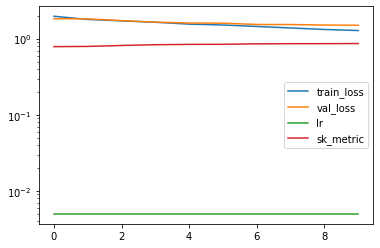

In [10]:
model_params = {'n_classes': 10,
                'residual': True,
                'in_channels': 3,
                'groups': 4,
                'bam': True,
                'dropout': [.1,.2,.3,.2,.1],
                #'act': None
               }


ds_params={'train_params': {'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor(),
                                                       transforms.Normalize(.13,.29)]),
                                          'target_transform': None}},
           'test_params': {'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(.13,.29)]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.005}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

l = Learn([TVDS,TVDS], 
          ResBam, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=32, epochs=10)

CDataset created...
TVDS created...
CDataset created...
TVDS created...
TorchVision model resnext50_32x4d loaded...
learning time: 0:01:01.059607
epoch: 0, lr: 0.01
train loss: 2.6429989066123962, val loss: 2.151353463049858
sklearn train metric: 0.5553856011566757, sklearn validation metric: 0.6833311088475378
learning time: 0:02:02.044367
epoch: 1, lr: 0.01
train loss: 2.1002339596748354, val loss: 2.073781390343943
sklearn train metric: 0.6865310961868275, sklearn validation metric: 0.7244263851591536
learning time: 0:03:03.607247
epoch: 2, lr: 0.01
train loss: 2.0038250622749327, val loss: 2.001435681696861
sklearn train metric: 0.7301383412233609, sklearn validation metric: 0.7420069466756658
learning time: 0:04:05.238711
epoch: 3, lr: 0.01
train loss: 1.957921489238739, val loss: 1.9798193227860235
sklearn train metric: 0.7460431569960464, sklearn validation metric: 0.7594777701457546
learning time: 0:05:06.579391
epoch: 4, lr: 0.01
train loss: 1.8887448148727417, val loss: 1.827

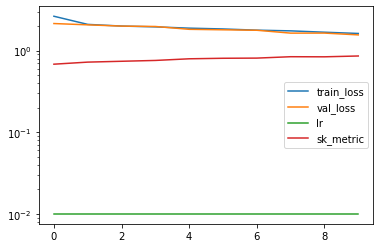

In [12]:
model_params = {'model_name': 'resnext50_32x4d',
                'in_channels': 3,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'dataset': 'CIFAR10',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'transform': transforms.Compose([
                                                       transforms.RandomRotation(10),
                                                       transforms.Resize(256),
                                                       transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'dataset': 'CIFAR10',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'transform': transforms.Compose([
                                                      transforms.Resize(256),
                                                      transforms.ToTensor()]),
                                         'target_transform': None}}}

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}

opt_params = {'lr': 0.01}

crit_params = {'reduction': 'sum'}

sample_params = {'set_seed': 88,
                 'splits': (.8,),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([TVDS,TVDS], 
          tv_model, 
          Selector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, 
          sample_params=sample_params, opt_params=opt_params, 
          sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)